# 1 Dimensional Dataset Workings

****
### 1D Histograms

In [2]:
# Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Importing the Dataset

d1 = np.loadtxt("./data/2_EDA/1D/example_1.txt")
d2 = np.loadtxt("./data/2_EDA/1D/example_2.txt")

In [12]:
d1.shape, d2.shape

((500,), (500,))

### Histogram Plots

Text(0, 0.5, 'Counts')

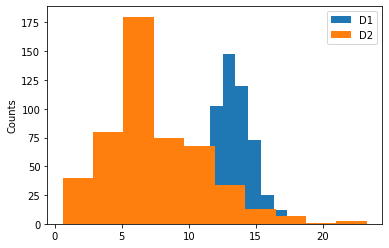

In [16]:
# First Level Basic Histogram

plt.hist(d1, label= "D1")
plt.hist(d2, label= "D2")
plt.legend();
plt.ylabel("Counts")

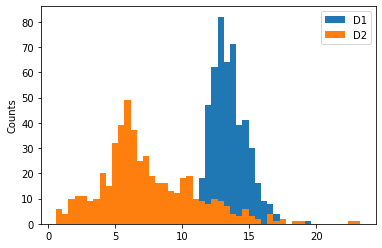

In [21]:
# We have Same 500 Data in D1&D2, but this plot shows otherwise as D1 is more finely binned than D2 
# We Cant make Much Sense here, So we try Unifying the Binning

# We use min and max of d1 and d2 for bin assignment
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()))

counts, bins, patches = plt.hist(d1, bins = bins, label = "D1")
#print(counts, bins, patches)
plt.hist(d2, bins=bins, label= "D2")
plt.legend();
plt.ylabel("Counts");

# The Colour will be Changed, it can be changed by interchanging d1 and d2 in the above plt.hist()

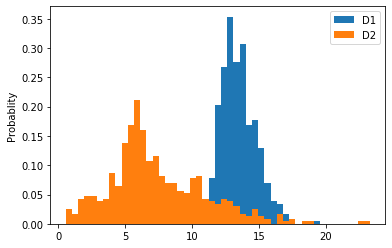

In [27]:
# We use min and max of d1 and d2 for bin assignment
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()))

# Instead of Counts, We need Probablity of Occurance, So we use
counts, bins, patches = plt.hist(d1, bins = bins, label = "D1", density= True)
#print(counts, bins, patches)
plt.hist(d2, bins=bins, label= "D2", density= True)
plt.legend();
plt.ylabel("Probablity");

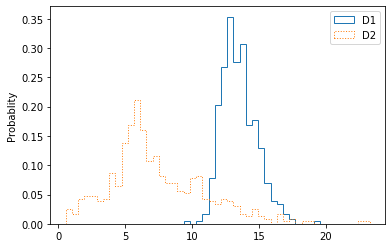

In [28]:
# To Get more Appealing Visual, we go for 

# We use min and max of d1 and d2 for bin assignment
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()))

# Instead of Counts, We need Probablity of Occurance, So we use
counts, bins, patches = plt.hist(d1, bins = bins, label = "D1", density= True, histtype="step", linewidth=1)
#print(counts, bins, patches)
plt.hist(d2, bins=bins, label= "D2", density= True, histtype="step", ls=":")
plt.legend();
plt.ylabel("Probablity");

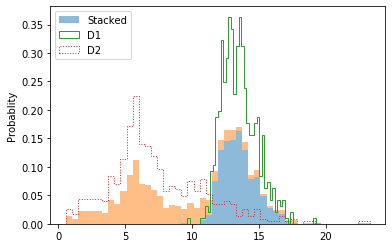

In [29]:
# If we want a Stacked Plot, we can Try

# We use min and max of d1 and d2 for bin assignment
#bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()))
bins = 50
# Create a Stacked Plot - for no of d1 in d2 etc
plt.hist([d1, d2], bins = bins, label = "Stacked", density= True, histtype="barstacked", alpha = 0.5)
# Instead of Counts, We need Probablity of Occurance, So we use
plt.hist(d1, bins = bins, label = "D1", density= True, histtype="step", linewidth=1)
#print(counts, bins, patches)
plt.hist(d2, bins=bins, label= "D2", density= True, histtype="step", ls=":")
plt.legend();
plt.ylabel("Probablity");

****
### 1D Bee Swarm Plots

In [31]:
# We need to Format the Data inorder for this to be Efficient

dataset = pd.DataFrame({
    "value": np.concatenate((d1, d2)), # We Pass D1 and D2 as a Tuple
    "type": np.concatenate((np.ones(d1.shape), np.zeros(d2.shape))) # To identify, whether they come from D1 or D2
})

In [34]:
dataset.tail()

,value,type
995,7.805,0.0
996,5.750,0.0
997,0.568,0.0
998,7.237,0.0
999,10.740,0.0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
value    1000 non-null float64
type     1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


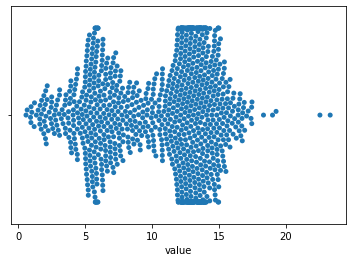

In [37]:
# Plot Swarmplot

sns.swarmplot(dataset["value"]);

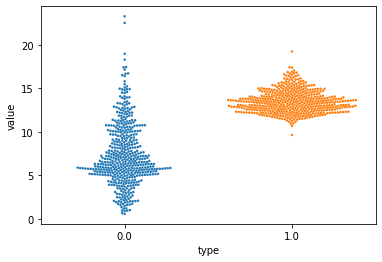

In [40]:
# Seperate D1 and D2

sns.swarmplot(x= "type", y= "value", data= dataset, size= 2.5);

In [41]:
# Long defined tails on D1, not in D2. They Both show evidence of Strong peaks but no strong evidence of BiModal distribution
# Utility of Bee Swarm plot increases as your data becomes more Categorical, but they lack Scientific Reigor

****
### Box and Violin Plots

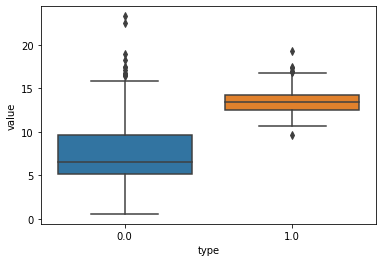

In [42]:
# Basic Boxplot

sns.boxplot(x= 'type', y="value", data=dataset);

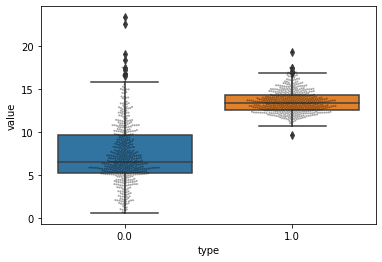

In [49]:
# We implement Both Box and BeeSwarm plot

sns.boxplot(x= 'type', y="value", data=dataset, whis = 1.5);
sns.swarmplot(x= "type", y= "value", data= dataset, size= 2, color='k',alpha = 0.35);

# It also constitutes to 5 number Summary

******
### Violin Plots

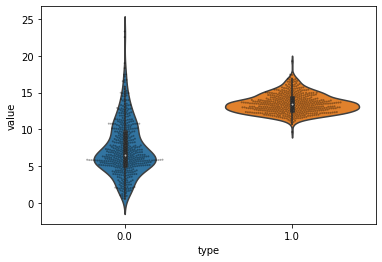

In [50]:
# We implement Both Box and BeeSwarm plot

sns.violinplot(x= 'type', y="value", data=dataset);
sns.swarmplot(x= "type", y= "value", data= dataset, size= 2, color='k',alpha = 0.35);

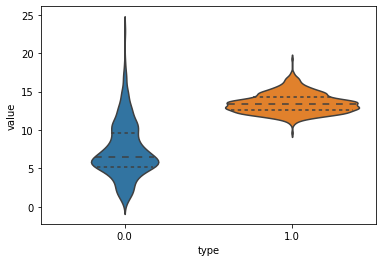

In [56]:
# We must Not Oversmooth so that important features gets missed, also adding quartile ranges. 
sns.violinplot(x= 'type', y="value", data=dataset, inner= "quartile", bw= 0.21); # Bandwith bw for broad or narrow smooth 
# If you Undersmooth your data you get a plot that has bit of Noise, but if you Oversmooth data, you smooth out Interesting
# features that you actually want to look at. It helps us from Overstating the Results (Oversmoothing/ Peak Identification)

# You can also split the Data in half(Eg: Top Male, Bottom Female), See Violin Plot Website

***
### Emperical CDF

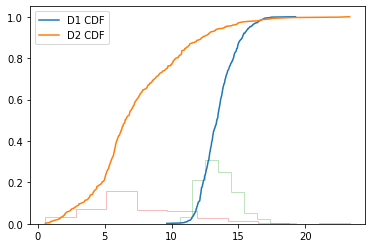

In [58]:
# Sort the Vaues
sd1 = np.sort(d1)
sd2 = np.sort(d2)

cdf = np.linspace(1/d1.size, 1, num=d1.size) # Instead of 0 at Start, we divide 1 by size so we get values nearby Zerpes

# Plot the CDF

plt.plot(sd1, cdf, label= "D1 CDF")
plt.plot(sd2, cdf, label= "D2 CDF")

# Plot the Histograms too to check it
plt.hist(d1, histtype= "step", density= True, alpha= 0.3)
plt.hist(d2, histtype= "step", density= True, alpha= 0.3)

# Display the Plot
plt.legend();
plt.show();

In [59]:
# We can Check the Discriptive Statistics

df = pd.DataFrame({'Data1': d1, 'Data2': d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000


*******

# Visualising N-Dimensional Data

***
### Scatter Plots

In [60]:
# Importing the Dataset

df_original = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [61]:
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# Remove the Column Rows having 0's in it Except Outcome

cols = [c for c in df_original.columns if c not in ["Pregnancies", "Outcome"]]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [63]:
df = df_original.copy()

In [65]:
# Replace all Rows in the Dataset Containing 0's to nan

df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [66]:
# Get the Info, size of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [67]:
# Get the Descriptive Statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


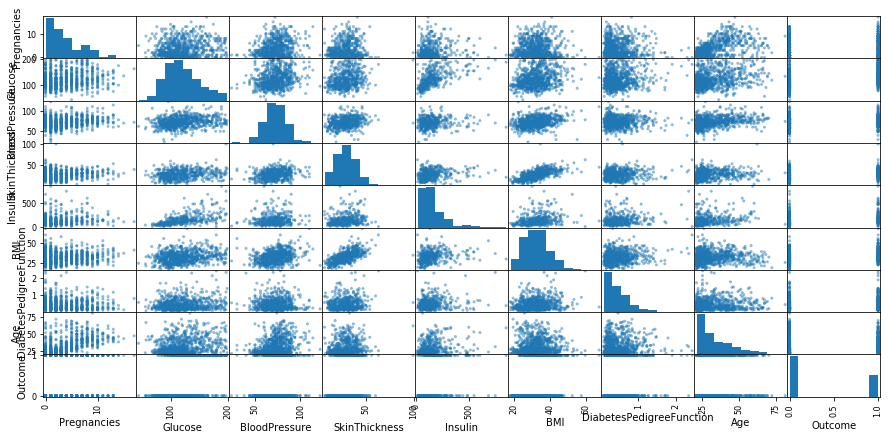

In [69]:
# Plot Scatter Matrix - Via Pandas
pd.plotting.scatter_matrix(df, figsize= (15,7));

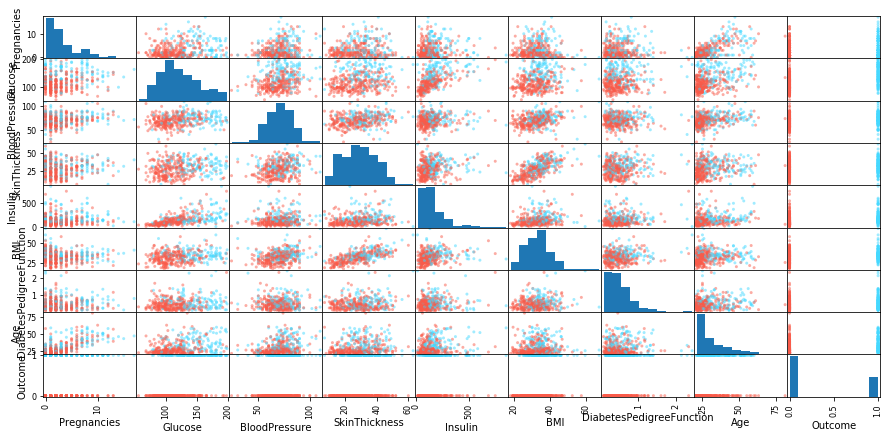

In [76]:
# We can See the Correlation between [thickness, insulin] and BMI, but we cant see the Outcome. So we assign Color

# Drop na values, so there is no problems in assigning the Color (Making even observations in all columns)
df2 = df.dropna()
colors = df2['Outcome'].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize= (15,7), color= colors);

In [77]:
# To get Clear Correlation(between Variables) analysis, we go by Correlation Matrix

****
### ND Correlation Matrix

In [78]:
# Correlation plot just shows Correlation between variables

# Show Correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


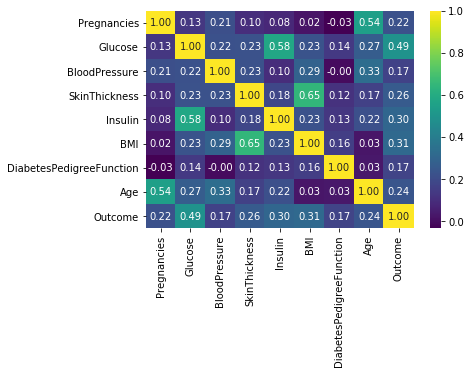

In [79]:
# Get the heatmap for the Correlation
sns.heatmap(df.corr(), annot= True, cmap= "viridis", fmt= "0.2f"); # Annotation Format for Decimal points

In [80]:
# We can Infer that for Outcome, Glucose, BMI and Insulin seems to be a point of Interest, fairly good predictors 

***
### 2D Histograms

In [81]:
# Import Dataframe

df2 = pd.read_csv('data/height_weight.csv')

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
sex       4231 non-null int64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(2), int64(1)
memory usage: 99.2 KB


In [84]:
df2.describe()

,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


In [85]:
# When Looking at data, we see height in Inches, weights in Pounds, Sex is between 1 and 2 with No knowledge on Gender

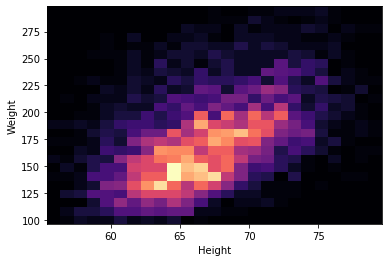

In [91]:
# Plot 2D Histogram

plt.hist2d(df2.height, df2.weight, bins=25, cmap= "magma")
plt.xlabel("Height")
plt.ylabel("Weight");

In [92]:
# We can Infer that the More tall you are, the More you weigh.

****
#### Contour Plot

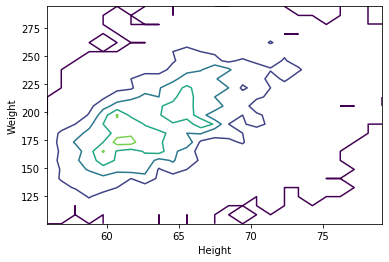

In [106]:
hist, x_edge, y_edge = np.histogram2d(df2.height, df2.weight, bins=25)

# Length of x must be number of columns in z.
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

# Plot Contour
plt.contour(x_center, y_center, hist, levels=4) # Shows no. of contours(borders) present
#plt.contour(x_center, y_center, hist, levels=[10]) # Everythong in the Contour has more than 10 datapoints in it
plt.xlabel("Height")
plt.ylabel("Weight");

***
### KDE Plots (Kernel Density Estimation)

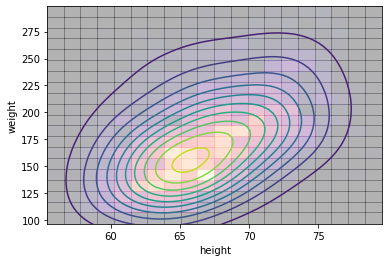

In [115]:
sns.kdeplot(df2['height'], df2['weight'], cmap= "viridis",bw=(2,20));

# Add Hist to it
plt.hist2d(df2['height'], df2['weight'], bins=20, cmap= "magma", alpha=0.3);

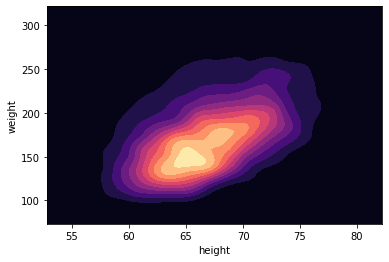

In [117]:
# For Presentations etc, you can use
sns.kdeplot(df2['height'], df2['weight'], cmap= "magma", shade=True);

***
### ND Scatter Probablity

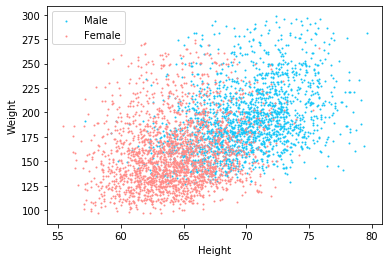

In [120]:
m = df2["sex"] == 1

# Plot a Scatter Plot
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c= "#16c6f7", s= 1, label= "Male")
plt.scatter(df2.loc[~ m, "height"], df2.loc[~ m, "weight"], c= "#ff8b87", s= 1, label= "Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);

In [122]:
# You can Treat Points with Probablity via ChainConsumer package
#!pip install chainconsumer

In [123]:
params = ["height", "weight"]
male = df2.loc[m, params].values
female = df2.loc[~m, params].values

In [125]:
male.shape, female.shape

((1946, 2), (2285, 2))

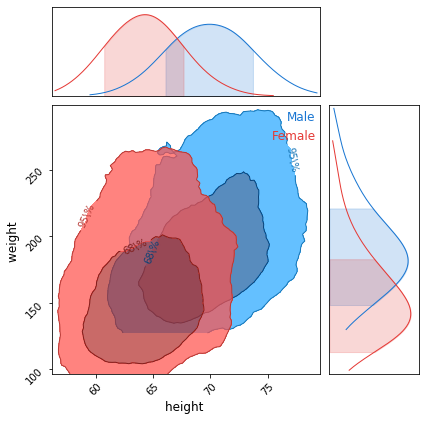

In [129]:
# Use ChainConsumer to Identify the Distribution
from chainconsumer import ChainConsumer

c = ChainConsumer()
c.add_chain(male, parameters= params, name= "Male", kde= 1.0, color= 'b')
c.add_chain(female, parameters= params, name= "Female", kde= 1.0, color= 'r')
c.configure(contour_labels= "Confidence", usetex=False, serif= False)
c.plotter.plot(figsize= 2.0);

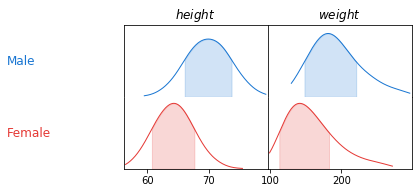

In [132]:
# Get the Summary Statistics of the Data Distribution of the Plots
c.plotter.plot_summary(figsize= 2.0);

## The Above Charts can be used to Explore relationships between data